# Propiedades de transporte termodinámico en un cristal modelado como un Gas de Lorentz modificado


**Equipo:**

- Jesús Alberto Teresa Vargas
- Orlando Sánchez Patiño
- Paulina Raquel Martín Cornejo
- Teodora Irene Ortiz Cruz

Este trabajo puede consultar en el repositorio de GitHub "Thermodynamical_transport_quasiperiodic_crystals" en https://github.com/PaulinaMartin96/Thermodynamical_transport_quasiperiodic_crystals

#### I. INTRODUCCIÓN

Lo mostrado en este trabajo, se basó en el artículo:
"Transport properties of a modified Lorentz gas"

De: H. Larralde, F. Leyvraz and C. Mej´ıa–Monasterio
Centro de Ciencias F´ısicas, Universidad Nacional Aut´onoma de Mexico
Av. Universidad 1001, Colonia Chamilpa, Cuernavaca, Morelos 62210 Mexico
(Dated: October 31, 2018)

En este paper se presenta un estudio a detalle sobre la transmisión de energía en un sistema que es solucionable a un nivel accesible de mecánica estadística.
Buscamos reproducir el material expuesto, para así generar una metodología que nos ayude a estudiar el comportamiento de cuasicristales.

El principio de las leyes macroscópicas del transporte termodinámico, sigue siendo un campo de estudio muy basto, ya que a partir de estas leyes fenomenológicas se podrían describir los procesos de difusión, conducción del calor, entre otras cosas. Resulta complicado vincular lo macroscópico con el estudio microscópico, allí es donde se encuetra la frontera actual de ese conocimiento.

#### II. DEFINICIÓN DEL MODELO

Se utiliza un gas de Lorentz en una dimesión para estudiar mediante colisiones el transporte de calor; se colocan dos paredes a diferentes temperaturas, de las cuales saldran partículas que colisionaran con discos fijos en rotación libre colocados entre las paredes (estas partículas, se supone que no interactuan entre ellas, solo con los discos fijos). Los discos tienen un momento de inercia y la colisión corresponde con la conservación de la energía, de modo que estos procesos son reversibles donde se coserva la energía total.
Las ecuaciones utilizadas para esto son:

$$ v'_n = -v_n $$

$$ v'_t = v_t - \frac{2 \eta}{1+ \eta}(v_t + Rw)$$

$$Rw'= Rw + \frac{2 \eta}{1+ \eta}(v_t + Rw)$$


Dónde:

$$\eta = \frac{\Theta}{mR^2}$$

$\Theta $: momento de inercia

R: radio de los discos

m: masa de las partículas 

w: la velocidad angular

$\eta$ : Parámetro adimesional que caracteríza a la colisión 

Cabe señalar que $\eta$ se toma siempre igual a 1 (A menos que se indique otra cosa), es decir:

$\eta = 1$

Para la distacia entre los cetros de los dispersores (W), se utilizó el conocido como horizonte crítico; es la separación más grade por la que una partícula no puede viajar distancias muy largas sin colisionar:

$W=\frac{4R}{\sqrt{3}}$

La energía del sistema está dada por:

$$ E = m \sum_{particulas} \frac{\textbf{(v_i)}^2}{2} +  \Theta \sum_{rotors} \frac{w_{\alpha}^2}{2}$$


#### III. BAÑO TERMO-QUÍMICO

Se plantea un modelo estocástico que modela un baño termoquímico que es capaz de intercambiar energía con respecto a una temperatura y a un potencial químico. Para esto se toma un reservorio de calor como un gas ideal que se coloca en contacto con el sistema de estudio, esto se hace asumiendo que las paredes que separan al sistema del depósito deja pasar las partículas. Se utilizan las siguientes reglas; cuado una partícula del sistema incide sobre la frontera del baño térmico, se retiran.


$$P_n(v_n) = \frac{m}{T} |vn| exp(-\frac{m(v_n)^2}{2T})$$

$$P_t(v_t) = \sqrt{\frac{m}{2\pi T}} |vn| exp(-\frac{m(v_t)^2}{2T})$$

$$ \gamma = \frac{1}{\sqrt{2\pi}}\rho T^{\frac{1}{2}}$$

$$ \mu = T * ln (\frac{\lambda_0  \gamma}{T^{\frac{3}{2}}}) $$


Dónde:

Se asume que la constante de Boltzmann es igual a 1

T: temperatura

$\mu$: potencia química

$ \rho$: densidad

$\lambda_0$: constante\\

Las ecuaciones anteriores definen completamente el algoritmo para el proceso de emisión estocástico del baño térmico.\\



#### IV. EQUILIBRIO Y EQUILIBRIO LOCAL TÉRMICO

En esta parte se aborda el estado de equilibrio que alcanza el modelo de la sección II; el estado de equilibrio que alcanza el sistema no depende de la elección particular del conjunto.
Para verificar esto, en el paper, se mide la distribución de velocidad de las partículas $P(v)$ y la velocidad angular de l distribución de discos $P(w)$. Estas las representamos mediante gráficas tomando en consideración 30 partículas en un canal de longitud de L=30, donde las líneas contínuas corresponden a la distribución de Boltzmann para una temperatura esperada de T=150.
Para verificar lo del equilíbrio que alcanza el modelo, se divide el canal en R  disjoint slabs (losas disjuntas) de ancho $\Delta x = \frac{L}{R}$ donde L es la longitud del canal en la dirección x.
n(x) da la densidad de partículas en cada losa y se calcula como el tiempo promedio:



\begin{equation}
n(x) d x=\frac{1}{\mathcal{T}} \int_{0}^{\mathcal{T}} \sum_{i=1}^{N} \delta\left(x-x_{i}(t)\right) d t d x
\end{equation}


Dónde:

$x_i$: posición de la i-ésima partícula en el tiempo t.

N: número total de partículas

\begin{equation}
\varepsilon(x) d x=\frac{1}{\mathcal{T}} \int_{0}^{\mathcal{T}} \sum_{i=1}^{N} E_{i}(t) \delta\left(x-x_{i}(t)\right) d t d x
\end{equation}

Dónde:

$\varepsilon(x)$: densidad de energía promediada e el tiempo.

$E_{i}(t)$: energía de la i-ésima partícula en el tiempo t.



$$\rho(x) = \int_{\Delta x} n(x)dx$$


Dónde:

$\rho(x)$: promedio de partículas encontradas en la losa de la posición x.




$$E(x) = \int_{\Delta x} \varepsilon (x)dx$$


Dónde:

$\rho(x)$: energía promedio de las partículas encontradas en la losa de la posición x.


$$T (x) = \frac{E(x)}{\rho (x)}..........(11)$$


Se graficaron estas ecuaciones en el paper para verificar que se alcanzaba el equilíbrio; el número de partículas fue de N = 30 y L = 30, la temperatura nominal en ambos baños se fijó a T = 150.

De este apartado nosotros no tomamos en cuenta las propiedades electromagnéticas que se abordan en el paper.

En el paper, posteriormente, se analizan las situaciones fuera de equilibrio, para esto, se dispusieron dos baños térmicos diferentes conectados a los dos extremos del sistema, cada uno de los baños tiene dados valores del potencial químico y de la temperatura. Para garantizar que el sistema esté fuera de equilíbrio, los valores finales de las temperaturas y potenciales químicos para los baños térmicos, se establecen para diferir por cantidades fijas. Se realizó la simulación tomando un canal de longitud L = 30, una diferencia de temperatura $\Delta T = 150 $ alrededor de un valor central T = 150, con una diferencia de  potencial químico $\Delta \frac{\mu}{T} = -0.2$.

In [108]:
using StatsBase, Plots, LinearAlgebra, StatsPlots

In [2]:
include("Geometric_structures.jl")
include("particle_disk_dynamics.jl")

Θ (generic function with 4 methods)

## Paso 1

Generamos el mallado que se utilizará para modelar el sistema. El hecho de que se construya al sistema con dos discos en la dirección vertical se debe a que en la geometría más simple de "célula única" con condiciones de contorno periódicas, los efectos espurios pueden surgir de múltiples dispersiones sucesivas de una partícula con el mismo disco.

In [3]:
rhomboid_per_dims = [20, 3]
rhomboid_diagonal = [1, 1.5]
rectangular_stripe = generate_rectangular_stripe(rhomboid_per_dims, rhomboid_diagonal, [0., 0.])
r_mesh_frontier = generate_rhomboid_mesh(rhomboid_per_dims, rhomboid_diagonal, rectangular_stripe; include_frontier = true)
r_mesh_nofrontier = generate_rhomboid_mesh(rhomboid_per_dims, rhomboid_diagonal, rectangular_stripe, include_frontier = false);

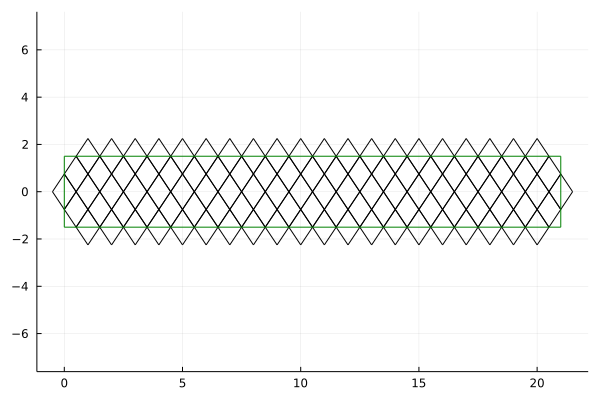

In [4]:
plot(r_mesh_frontier)

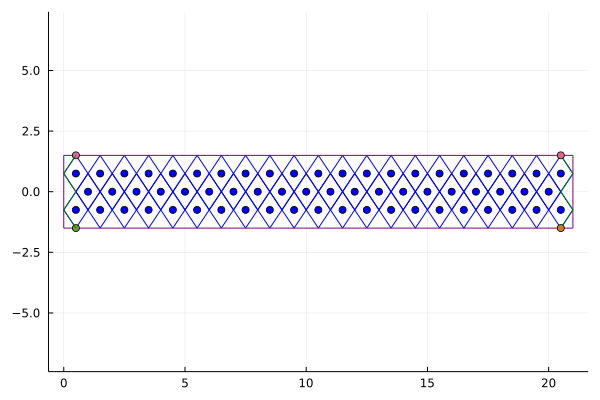

In [5]:
cells = r_mesh_nofrontier.cells;

plot(r_mesh_nofrontier, plot_cell_center = true, color_cell = :blue, color_mesh_shape = :purple)
plot!(cells[1].segments[1]; color = :green)
scatter!(Tuple(cells[2].segments[1].final_point))
scatter!(Tuple(cells[1].segments[2].final_point))
plot!(cells[1].segments[2]; color = :green)
plot!(cells[2].segments[1]; color = :green)
plot!(cells[2].segments[2]; color = :green)
plot!(cells[end].segments[3]; color = :green)
plot!(cells[end].segments[4]; color = :green)
plot!(cells[end-1].segments[3]; color = :green)
scatter!(Tuple(cells[end].segments[4].final_point))
scatter!(Tuple(cells[end-1].segments[3].initial_point))
plot!(cells[end- 1].segments[4]; color = :green)

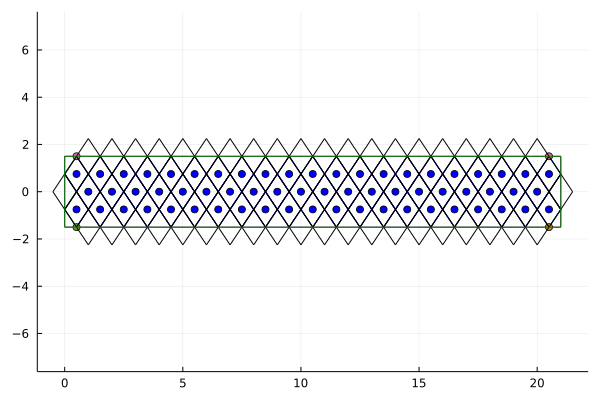

In [6]:
plot!(r_mesh_frontier)

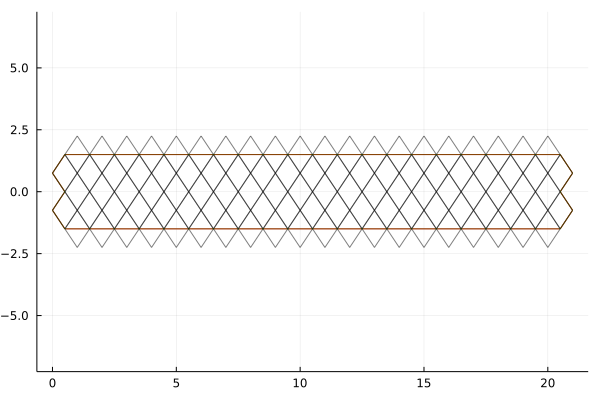

In [7]:
rhomboid_per_dims = [20, 3]
rhomboid_diagonal = [1, 1.5]
frontier_lorentz = generate_frontier_lorentz_gas(rhomboid_per_dims, rhomboid_diagonal; include_frontier = false)
mesh_lorentz = generate_rhomboid_mesh(rhomboid_per_dims, rhomboid_diagonal, frontier_lorentz; include_frontier = true)
plot(frontier_lorentz, ratio = :equal, legend = :false, color = :red)
plot!(mesh_lorentz, alpha = 0.5)

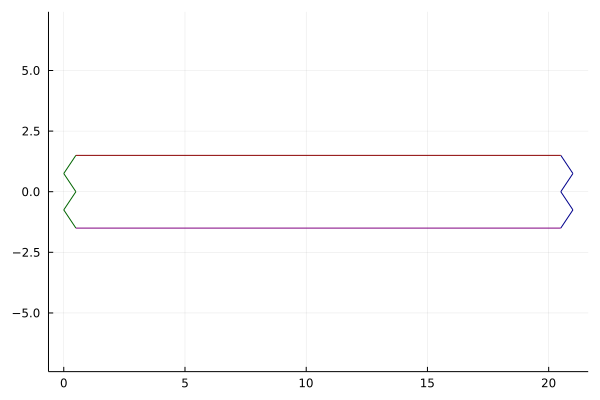

In [8]:
mesh_frontier_lorentz = mesh_frontier(frontier_lorentz)

plot(legend = false, ratio = :equal)
plot!(mesh_frontier_lorentz.left_side, color = :darkgreen)
plot!(mesh_frontier_lorentz.right_side, color = :darkblue)
plot!(mesh_frontier_lorentz.upper_side, color = :darkred)
plot!(mesh_frontier_lorentz.lower_side, color = :purple)

In [9]:
function generate_hard_disks_vector(mass::T1, radius::T1, positions::Vector{Vector{T1}}, angular_velocity::Vector{Vector{T1}}, mesh::Mesh{T2, T1}) where {T1 <: Real, T2 <: Real}
    n = length(positions)
    hard_disks_vec = Vector{Hard_Disk{T1}}(undef, n)
    for i in 1:n
        hard_disks_vec[i] = hard_disk(mass, radius, positions[i], angular_velocity[i], mesh)
    end
    return hard_disks_vec
end

generate_hard_disks_vector (generic function with 1 method)

## Paso 2

Consideramos una partícula puntual con posición $\vec{x}$ y velocidad dada $\vec{v}$ y un disco duro fijo con un radio $r$ y posición $\vec{c}$ dados. Definiremos una función que devuelva true o false si ocurre una colisión entre el disco y la partícula. Si hay colisión también arroja también el punto de colisión $vec{x}_f$ y el tiempo $t_c$ en el que ocurre, y si no hay colisión, arroja [Inf, Inf] e Inf. 


Reolvemos analíticamente al escribir la ecuación de la trayectoria de la partícula paramétricamente (en términos del tiempo) y la ecuación para la ecuación de la circunferencia y calcular al intersección. Como no hay fuerzas externas, la particula puntual llevara a cabo un movimiento rectilineo uniforme. La solución correcta, en términos del parámetro, es la positiva si la partícula está dentro del círculo y la más pequeña si está fuera del círculo. Si la solución fuera negativa, significa que no hay colisión y la función debe arrojar [Inf, Inf] e Inf (pues se trataría de un tiempo negativo). Siguiendo el enfoque dado en la tarea, únicamente se utilizará el caso donde la partícula está fuera del disco, y por tanto, se seleccionará la solución cuya magnitud sea la menor. 

La ecuación de la circunferencia con centro $\vec c = (c_x, c_y)$ es 

$$ (x - c_x)^2 + (y - c_y)^2 = r^2. $$

Sustituyendo las ecuaciones de movimiento de la partícula en la ecuación de la circunferencia llegamos a que

$$ (v_x t + x_0 - c_x)^2 + (v_y t + y_0 - c_y)^2 = r^2) $$

$$ \Rightarrow (v_x t + x_0)^2 - 2(v_x t + x_0)c_x + c_x^2 + (v_y t + y_0)^2 - 2(v_y t + y_0)c_y + c_y^2 = r^2 $$

$$ \Rightarrow v^2_x t^2 + 2 v_x x_0 t + x^2_0 - 2v_x c_x t - 2x_0 c_x + c_x ^2 + v^2_y t^2 + 2 v_y y_0 t + y^2_0 - 2v_y c_y t- 2y_0 c_y + c_y^2= r^2$$

Agrupando términos llegamos a que

$$ (v^2_x + v^2_y) t^2 + (2 v_x x_0 - 2 v_x c_x + 2 v_y y_0 - 2v_y c_y) t + (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2) = 0 $$

donde $a = v^2_x + v^2_y$, $b = 2 v_x x_0 - 2 v_x c_x + 2 v_y y_0 - 2v_y c_y $  y  $c = x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2$.

Por lo que las soluciones dadas por la fórmula general son

$$ t = \dfrac{- 2(v_x x_0 - v_x c_x + v_y y_0 - v_y c_y) \pm \sqrt{4( v_x x_0 - v_x c_x + v_y y_0 - v_y c_y)^2 - 4 (v^2_x + v^2_y) (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2)}}{2 (v^2_x + v^2_y)}  $$

$$ \Rightarrow t = \dfrac{- 2(v_x x_0 - v_x c_x + v_y y_0 - v_y c_y) \pm 2\sqrt{( v_x x_0 - v_x c_x + v_y y_0 - v_y c_y)^2 -  (v^2_x + v^2_y) (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2)}}{2 (v^2_x + v^2_y)}  $$

$$ \Rightarrow t = \dfrac{- (v_x x_0 - v_x c_x + v_y y_0 - v_y c_y) \pm \sqrt{( v_x x_0 - v_x c_x + v_y y_0 - v_y c_y)^2 -  (v^2_x + v^2_y) (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2)}}{ (v^2_x + v^2_y)}  $$


$$ (v^2_x + v^2_y) t^2 + (2 v_x x_0 - 2 v_x c_x + 2 v_y y_0 - 2v_y c_y) t + (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- 4 r^2) = 0 $$

donde $$a = v^2_x + v^2_y$$, $$b = 2 v_x x_0 - 2 v_x c_x + 2 v_y y_0 - 2v_y c_y $$  y  $$c = x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2$$.

Dado un vector de tiempos, donde se tienen las soluciones de las ecuaciones previas, se define una función que seleccione el valor correcto de tiempo que corresponde a la solución.

In [10]:
function select_time(t::Vector{T}) where T <: Real
    if t[1] < 0 && t[2] < 0
        return error("The system does not have a physical solution for the specified collision. The solutions obtained account for negative times.")
    
    elseif t[1] > 0 && t[2] > 0
        t_c = findmin(t)[1]
        return t_c
        
    elseif (t[1] < 0 || t[2] < 0) || (t[1] > 0 || t[2] > 0) # Para hacer este caso mas especifico podria agregarse una condicion adicional: & !(t[1] < 0 && t[2] < 0)
        index = findfirst(x -> x > 0, t)
        t_c = t[index]
        return t_c
   
    elseif t[1] == 0 && t[2] == 0
        return error("The collision occurred at the initial time.")
    
    else
        return error("This function only receives a two-dimensional vector.")
    end
end

select_time (generic function with 1 method)

In [11]:
function particle_disk_collision(disk::Hard_Disk{T}, particle::Particle{T}, method::Val{:method1}) where {T <: Real}
    (; mass, position, angular_velocity, radius, cell) = disk
    disk_position, disk_angular_velocity, disk_radius = position, angular_velocity, radius
    (; mass, position, velocity, normal_velocity, tangential_velocity, cell) = particle
    particle_mass, particle_position, particle_velocity, particle_normal_velocity, particle_tangential_velocity = mass, position, velocity, normal_velocity, tangential_velocity
    
    disk_particle_vec = particle_position - disk_position # vector que une al centro del disco con la particula
    proj = projection(particle_velocity, disk_particle_vec) #proyeccion de la velocidad sobre el vector previamente definido
    
    if proj < 0 # Hay colision y no se empalman
        # Ecuacion general
        a = particle_velocity[1]^2 + particle_velocity[2]^2
        b = 2 * (particle_velocity[1] * particle_position[1] - particle_velocity[1] * disk_position[1] + particle_velocity[2] * particle_position[2] - particle_velocity[2] * disk_position[2])
        c = particle_position[1]^2 + particle_position[2]^2 + disk_position[1]^2 + disk_position[2]^2 - 2 * particle_position[1] * disk_position[1] - 2 * particle_position[2] * disk_position[2] - disk_radius^2
        Δ = b^2 - 4 * a * c
        if Δ >= 0
            t1_sol = (-b + sqrt(Δ)) / (2 * a)
            t2_sol = (-b - sqrt(Δ)) / (2 * a)
            t_sol = [t1_sol, t2_sol]
            t_collision = select_time(t_sol)
            𝑣𝑒𝑐𝑥𝑓 =  [x_particle(particle_position, particle_velocity, t_collision), y_particle(particle_position, particle_velocity, t_collision)]
            return true, 𝑣𝑒𝑐𝑥𝑓, t_collision
        else
            return false, [Inf, Inf], Inf
        end
    
    elseif proj > 0 # No hay colision y no se empalman
        return false, [Inf, Inf], Inf
        
    else
        return "La proyeccion es cero"
    end
    
end

particle_disk_collision (generic function with 1 method)

In [12]:
particle_disk_collision(particle::Particle{T}, disk::Hard_Disk{T}, method::Val{:method1}) where {T <: Real} = particle_disk_collision(disk, particle, method::Val{:method1})

particle_disk_collision (generic function with 2 methods)

In [13]:
particle_disk_collision(disk::Hard_Disk{T}, particle::Particle{T}, method::Symbol) where T <: Real = particle_disk_collision(disk, particle, Val(method))
particle_disk_collision(particle::Particle{T}, disk::Hard_Disk{T}, method::Symbol) where {T <: Real} = particle_disk_collision(disk, particle, method)

particle_disk_collision (generic function with 4 methods)

Con base en la ecuaciones 

## Paso 3
Partiendo de las ecuaciones conservación de energía y momento la partícula y el disco, se obtienen las ecuaciones brindadas en el punto II. DEFINCIÓN DEL MODELO. Con esto, proponemos la función que determina si ocurre la colisión y con ello calcula las velocidades después de la colisión entre las partículas dadas las posiciones de los centros de las partículas en el punto de colisión, los radios y las velocidades iniciales. Con esto haz una función que dados los radios, posiciones y velocidades de 2 discos, arroje true y las posiciones y velocidades de las partículas justo después de la colisión si estas colisionan y false e [Inf, Inf] y [Inf, Inf] si no colisionan.  

In [14]:
function particle_disk_collision_dynamics(disk::Hard_Disk{T}, particle::Particle{T}; method::Symbol = :method1, coord::Symbol = :z) where {T <: Real} # _1 for disk, _2 for particle
    (; mass, position, angular_velocity, radius, cell) = disk
    disk_position, disk_angular_velocity, disk_radius = position, angular_velocity, radius
    (; mass, position, velocity, normal_velocity, tangential_velocity, cell) = particle
    particle_mass, particle_position, particle_velocity, particle_normal_velocity, particle_tangential_velocity = mass, position, velocity, normal_velocity, tangential_velocity
    collision = particle_disk_collision(disk, particle, method)[1:3]
    
    if collision[1]
        eta = η(Θ, particle_mass, disk_radius; coord = coord) # moment of inertia, mass of the particle, 
        α = (2 / (1 + eta)) .* (particle_tangential_velocity .- (disk_radius .* disk_angular_velocity))
        particle_normal_velocity_f = - particle_normal_velocity
        particle_tangential_velocity_f = particle_tangential_velocity .- (eta * α) 
        particle_velocity_f = particle_normal_velocity_f .+ particle_tangential_velocity_f
        disk_angular_velocity_f = ((disk_radius .* disk_angular_velocity) .+ α) ./ disk_radius
        return collision[1], collision[2], collision[3], particle_velocity_f, disk_angular_velocity_f
    else
        return collision
    end
end

particle_disk_collision_dynamics (generic function with 1 method)

## Paso 4

Posteriormente, hacemos una función que nos permita cambiar de celda a las partículas al evolucionar el sistema. Para ello, es necesario definir una función que dadas las posiciones y velocidades de las partículas, encuentre qué partícula sale primero de su respectiva celda y que arroje el índice de la partícula, el tiempo que tarda en salir y la celda a la que entra. Esto se realiza a partir de las siguientes funciones.

### (i) Intersección entre la partícula y su respectiva celda

Este inciso puede implementarse de varias maneras. Una de ellas es encontrando la intersección de una particula con la frontera de la celda. Para ello, es necesario encontrar primero la intersección de un punto con un segmento, y luego de un punto con un conjunto de segmentos. Esta interseccion puede calcularse de forma analitica o de forma numerica. Esto se puede hacer con las funciones `point_on_segment` y `point_on_polygon_frontier`, o bien, definidiendo nuevas funciones para encontrar la intersección entre dos rectas. Éste último es el enfoque que se adoptará para el presente trabajo.

Las ecuaciones para el movimiento rectilíneo uniforme de una particula con posición incial $\vec{x_0}$ y  velocidad $\vec{v}$ son:

$$ x(t) = x_0 + v_x t $$
$$ y(t) = y_0 + v_y t. $$

Por otra parte, dado un segmento con puntos incial y final, $\vec{x_i}$ y $\vec{x_f}$ respectivamente, las ecuaciones paramétricas correspondientes son:

$$ x(t) = x_i + (x_f - x_i) t $$
$$ y(t) = y_i + (y_f - y_i) t. $$

Igualando ambas ecuaciones obtenemos 

$$ x_0 + v_x t = x_i + (x_f - x_i) t $$
$$ y_0 + v_y t = y_i + (y_f - y_i) t $$,

$$ (x_0 - x_i) + (v_x - x_f + x_i) t = 0 $$
$$ (y_0 - y_i) + (v_y - y_f + y_i) t = 0 $$,

Por tanto, 

$$ t_x = \dfrac{x_i - x_0}{v_x - x_f + x_i} $$
$$ t_y = \dfrac{y_i - y_0}{v_y - y_f + y_i}. $$

Notamos que si $t_i < 0$ p.a. $i$, entonces esa opción debe descartarse pues indica que la colisión entre la particula y el segmento ocurre para tiempos negativos. Esto implica que la particula tuvo que haber colisionado previamente con ese segmento, o bien, que la velocidad de la particula debe tener sentido contrario a la que presenta en ese momento para que la colisión pueda ocurrir.

Definimos primero la función para encontrar la intersección entre una partícula y un segmento

In [15]:
function particle_segment_intersection(particle::Particle{T}, segment::Segment{T}) where T <: Real
    (; mass, position, velocity, normal_velocity, tangential_velocity, cell) = particle
    t = [vector_segment_intersection(velocity, position, segment, s) for s in [:x, :y]]
    t_intersection = select_time(t)
end

particle_segment_intersection (generic function with 1 method)

In [16]:
s0 = segment([0, -1.], [0., 1.])
particle0 = particle(2., [0., 0.], [1., 0.], r_mesh_frontier)
particle_segment_intersection(particle0, s0)

0.5

In [17]:
particle1 = particle(2., [0., 0.], [1., 0.], r_mesh_frontier)
particle_segment_intersection(particle1, s0)

0.5

In [18]:
particle2 = particle(2., [0., -1], [1., -2], r_mesh_frontier)
particle_segment_intersection(particle2, s0)

LoadError: BoundsError: attempt to access 0-element Vector{Int64} at index [1]

Probamos un caso en el que no hay intersección

In [19]:
r_mesh_frontier.cells[3].segments[1]

Segment{Float64}([0.5, -1.5], [1.0, -0.75], 0.9013878188659973)

In [20]:
particle_segment_intersection(particle1, r_mesh_frontier.cells[35].segments[1])

13.0

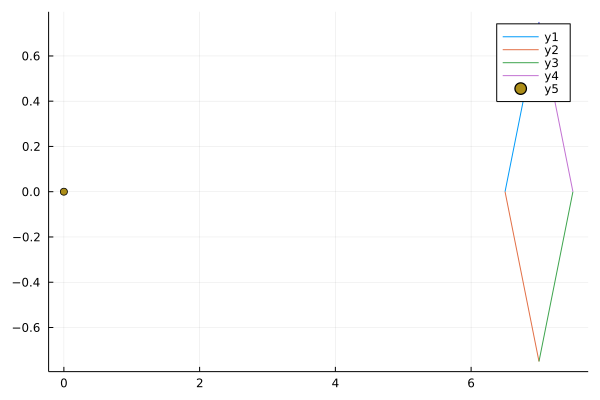

In [21]:
plot(r_mesh_frontier.cells[35])
scatter!(Tuple(particle1.position))

Probamos otro caso donde si hay intersección

In [22]:
rhomboid1 = rhomboid([1., 1.], particle1.position, :vertical)

Rhomboid{Float64}([1.0, 1.0], [[-0.5, 0.0], [0.0, -0.5], [0.5, 0.0], [0.0, 0.5]], Segment{Float64}[Segment{Float64}([-0.5, 0.0], [0.0, 0.5], 0.7071067811865476), Segment{Float64}([-0.5, 0.0], [0.0, -0.5], 0.7071067811865476), Segment{Float64}([0.0, -0.5], [0.5, 0.0], 0.7071067811865476), Segment{Float64}([0.5, 0.0], [0.0, 0.5], 0.7071067811865476)], [0.0, 0.0])

In [23]:
rhomboid1.segments[1]

Segment{Float64}([-0.5, 0.0], [0.0, 0.5], 0.7071067811865476)

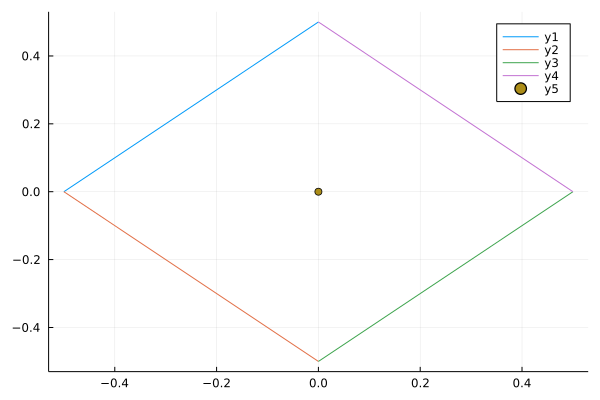

In [24]:
plot(rhomboid1)
scatter!(Tuple(particle1.position))

In [25]:
particle_segment_intersection(particle1, rhomboid1.segments[4])

0.3333333333333333

In [26]:
vector_segment_intersection(particle1.velocity, particle1.position, rhomboid1.segments[4], :x)

0.3333333333333333

In [27]:
particle_segment_intersection(particle1, rhomboid1.segments[4])

0.3333333333333333

In [28]:
segment([0., 0.], [0., 0.])

Segment{Float64}([0.0, 0.0], [0.0, 0.0], 0.0)

Ahora definimos una función que, a partir de la anterior, encuentre la intersección entre un polígono (en este caso la celda que contiene a la partícula) y una partícula.

In [29]:
"""
Determines whether the cell correspond to a frontier cell or not. If the cell is a frontier cell, then this function clasifies
the cell into four categories (:left, :right, :upper, :lower) depending on the side of the frontier shape.
"""
function find_type_of_frontier_polygon(polygon::Rhomboid{T1}, mesh::Mesh{T2, T1}) where {T1 <: Real, T2 <: Real}
    cells_frontier_dict = get_frontier(mesh)
    #for (key, val) in cells_frontier_dict
    type_of_polygon = :nothing
    for key in keys(cells_frontier_dict)
        if (polygon ∈ cells_frontier_dict[key])
            type_of_polygon = key
            break
        elseif (polygon ∉ cells_frontier_dict[key])
            type_of_polygon = :center
        else
            error("This polygon or cell dos not belongs to the specified mesh.")
        end
    end
    return type_of_polygon    
end

find_type_of_frontier_polygon

In [30]:
"""
Determines whether or not the particle intersects with its corresponding frontier. If an intersection occurs, then the minimum time
and the segment of intersection is given.
"""
function particle_polygonfrontier_intersection(particle::Particle{T1}, polygon::Rhomboid{T1}, mesh::Mesh{T2, T1}) where {T1 <: Real, T2 <: Real}
    (; mass, position, velocity, normal_velocity, tangential_velocity, cell) = particle
    mesh_frontier = mesh.frontier
    #(; diagonal, vertices, segments, center) = polygon
    cells_frontier_dict = get_frontier(mesh) # this is an array of Rhomboids
    cells_on_frontier = get_frontier(mesh, get_array = true)
    type_of_frontier_polygon = find_type_of_frontier_polygon(polygon, mesh) # this is a symbol
    frontier_types_dict = Dict(:upper => mesh_frontier.upper_side.segments, :lower => mesh_frontier.lower_side.segments, :left => mesh_frontier.left_side.segments, :right => mesh_frontier.right_side.segments)
    # if the cell is a frontier cell, then the intersection is calculated with the mesh frontier and not with the cell frontier
    if polygon ∈ cells_on_frontier
        segments = frontier_types_dict[type_of_frontier_polygon]
    elseif polygon ∉ cells_on_frontier
        segments = polygon.segments
    end
    
    min_intersection = (Inf, segment([0., 0.], [0., 0.]), 0)
    for (i, segment) in enumerate(segments) 
        try
            t = particle_segment_intersection(particle, segment)
            if t < min_intersection[1]
                min_intersection = (t, segment, i)
            end
        catch e
            continue
        end
    end
       
    return min_intersection
end

particle_polygonfrontier_intersection

In [31]:
particle_polygonfrontier_intersection(particle1, rhomboid1, mesh_lorentz)

(0.3333333333333333, Segment{Float64}([0.5, 0.0], [0.0, 0.5], 0.7071067811865476), 4)

Probamos esta función

In [32]:
rhomboid1 = rhomboid([1, 1.], particle1.position, :vertical)

Rhomboid{Float64}([1.0, 1.0], [[-0.5, 0.0], [0.0, -0.5], [0.5, 0.0], [0.0, 0.5]], Segment{Float64}[Segment{Float64}([-0.5, 0.0], [0.0, 0.5], 0.7071067811865476), Segment{Float64}([-0.5, 0.0], [0.0, -0.5], 0.7071067811865476), Segment{Float64}([0.0, -0.5], [0.5, 0.0], 0.7071067811865476), Segment{Float64}([0.5, 0.0], [0.0, 0.5], 0.7071067811865476)], [0.0, 0.0])

In [33]:
#particle2 = particle(2., [-2., 0.], [1, 1.], r_mesh_frontier)

In [34]:
#particle_polygonfrontier_intersection(particle2, rhomboid1, r_mesh_frontier)

### (2) Celdas adyacentes, vecinos y celda a la que entra la partícula
Ahora necesitamos la celda a la que entra la partícula.

In [35]:
function neighbours(cell::Rhomboid{T1}, mesh::Mesh{T2, T1}) where {T1 <: Real, T2 <: Real}
    (; diagonal, vertices, segments, center) = cell
    a = [diagonal[1] * 0.5, 0.]
    b = [0, diagonal[2] * 0.5]
    v1 = a .+ b
    v2 = a .- b
    neighbours_center_points = setdiff([center .+ (m * v1) .+ (n .* v2) for m in -1:1 for n in -1:1], center)
    neighbours_idx = [find_cell(center_point, mesh) for center_point in neighbours_center_points]
    return (neighbours_idx, neighbours_center_points)
end

neighbours (generic function with 1 method)

In [36]:
function translate_mesh(mesh::Mesh, trans_vec::Vector)
    cells_per_dims = mesh.cells_per_dims
    cell_size = mesh.cell_size
    include_frontier = mesh.include_frontier
    frontier = generate_frontier_lorentz_gas(cells_per_dims, cell_size; init_point = trans_vec)
    mesh_trans = generate_rhomboid_mesh(cells_per_dims, cell_size, frontier; include_frontier = include_frontier, init_point = trans_vec)
    
    return mesh_trans
end

function get_extended_mesh(mesh::Mesh)
    m, n = mesh.cells_per_dims
    d1, d2 = mesh.cell_size
    trans_vec_arr = [[-m * d1, 0.], [m * d1, 0.], [0., -2 * d2], [0., 2 * d2]] # only works for 2 rows
    
    return [(trans_vec, translate_mesh(mesh, trans_vec)) for trans_vec in trans_vec_arr]
end

function get_trans_vectors(diagonal)
    a = [diagonal[1] * 0.5, 0.]
    b = [0., diagonal[2] * 0.5]
    v1 = a + b
    v2 = a - b
    return v1, v2
end

get_trans_vectors (generic function with 1 method)

In [37]:
function find_neighbors(cell::Rhomboid{T1}, mesh::Mesh{T2, T1}) where {T1 <: Real, T2 <: Real}
    (; diagonal, vertices, segments, center) = cell
    v1, v2 = get_trans_vectors(diagonal)
    neighbors_centers = [
        center + (m * v1) + (n * v2)
        for m in -1:1, n in -1:1]
        #if !((m == 0) & (n == 0))]
    indices = Vector{Int}(undef, length(neighbors_centers))
    for (idx, center) in enumerate(neighbors_centers)
        cell_idx = find_cell(center, mesh)
        length(cell_idx) == 0 ? (indices[idx] = -1) : (indices[idx] = cell_idx[1])
        if point_on_polygon_frontier(center, mesh.frontier.shape)
            indices[idx] = -1
        end
    end
    
    on_extended_mesh_indices = findall(x -> x == -1, indices)
    on_extended_mesh_centers = neighbors_centers[on_extended_mesh_indices]
    
    extended_mesh = get_extended_mesh(mesh)
    for idx in on_extended_mesh_indices
        center = neighbors_centers[idx]
        
        for (trans_vec, ex_mesh) in extended_mesh
            extended_idx = find_cell(center, ex_mesh)
            if length(extended_idx) != 0
                extended_center = ex_mesh.cells_centers[extended_idx[1]]
                inv_trans_center = extended_center - trans_vec
                original_idx = find_cell(inv_trans_center, mesh)
                if length(original_idx) != 0
                    indices[idx] = original_idx[1]
                    neighbors_centers[idx] = inv_trans_center
                end
            end
        end
    end
    
    return unique(indices), unique(neighbors_centers), on_extended_mesh_centers
end

find_neighbors (generic function with 1 method)

Hacemos algunas pruebas

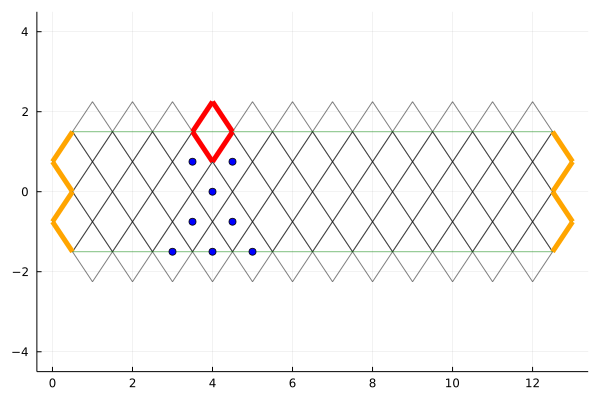

In [38]:
rhomboids_per_dims = [12, 2]
rhomboid_diagonal = [1, 1.5]
frontier_lorentz = generate_frontier_lorentz_gas(rhomboids_per_dims, rhomboid_diagonal)
mesh_lorentz = generate_rhomboid_mesh(rhomboids_per_dims, rhomboid_diagonal, frontier_lorentz, include_frontier = true)

cell = mesh_lorentz.cells[22]
neighbors_indices, neighbors_centers, on_extended = find_neighbors(cell, mesh_lorentz);

p = plot(mesh_lorentz, alpha = 0.5, plot_cell_center = false)

for center in neighbors_centers
    scatter!([center[1]], [center[2]], color = :blue)
end

#scatter!(Tuple.(on_extended))
#scatter!(Tuple(cell.center))
plot!.(mesh_lorentz.reflective_segments, color=:orange, lw=5)

plot!(cell, color = :red, lw=5)
p

In [39]:
find_neighbors(mesh_lorentz.cells[22], mesh_lorentz)[3]

6-element Vector{Vector{Float64}}:
 [3.0, 1.5]
 [3.5, 2.25]
 [4.0, 3.0]
 [4.0, 1.5]
 [4.5, 2.25]
 [5.0, 1.5]

In [40]:
a, b, c = find_neighbors(mesh_lorentz.cells[22], mesh_lorentz)

([11, 15, 19, 18, 16, 20, 23, 21], [[3.0, -1.5], [3.5, -0.75], [4.0, 0.0], [3.5, 0.75], [4.0, -1.5], [4.5, -0.75], [4.5, 0.75], [5.0, -1.5]], [[3.0, 1.5], [3.5, 2.25], [4.0, 3.0], [4.0, 1.5], [4.5, 2.25], [5.0, 1.5]])

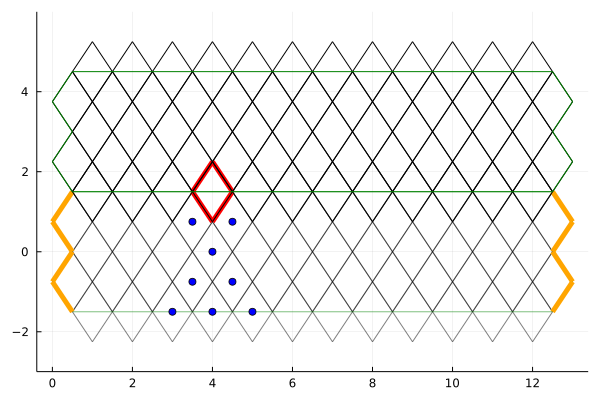

In [41]:
plot!(get_extended_mesh(mesh_lorentz)[4][2])

### (3) Primera partícula en salir de su celda


Ahora definimos la función que dadas las posiciones y velocidades de las partículas, encuentre qué partícula sale primero de su respectiva celda y que arroje el índice de la partícula, el tiempo que tarda en salir y la celda a la que entra.

In [42]:
find_neighbors(mesh_lorentz.cells[22], mesh_lorentz)

([11, 15, 19, 18, 16, 20, 23, 21], [[3.0, -1.5], [3.5, -0.75], [4.0, 0.0], [3.5, 0.75], [4.0, -1.5], [4.5, -0.75], [4.5, 0.75], [5.0, -1.5]], [[3.0, 1.5], [3.5, 2.25], [4.0, 3.0], [4.0, 1.5], [4.5, 2.25], [5.0, 1.5]])

In [43]:
function first_particle_to_exit_cell(particles::Vector{Particle{T1}}, mesh::Mesh{T2, T1}) where {T1 <: Real, T2 <: Real}
    exit_times_and_segments = [particle_polygonfrontier_intersection(particle, mesh.cells[particle.cell], mesh) for particle in particles]
    exit_times = [p[1] for p in exit_times_and_segments]
    min_time, first_particle_idx = findmin(exit_times)
    first_particle = particles[first_particle_idx]
    neighbours_indices, neighbours_centers, extended_mesh_centers = find_neighbors(mesh.cells[first_particle.cell], mesh)
    neighbours = mesh.cells[neighbours_indices]
    #exit_segment = exit_times_segments[first_particle][2]
    adjacent_cell_idx, adjacent_cell, neighbours = find_adjacent_cell(min_time, first_particle, neighbours, mesh) #celda a la que entra
    
    return first_particle_idx, min_time, adjacent_cell
end

first_particle_to_exit_cell (generic function with 1 method)

## Paso 5
El siguiente paso es encontrar qué colisión ocurre primero, dado un vector de partículas, un vector de discos y un mallado. La función devuelve el mínimo tiempo de colisión entre todas las partículas dado el arreglo de discos duros y el índice de la celda en la cuál ocurre esta primera colisión.

In [44]:
function find_hard_disk(disks_vec::Vector{Hard_Disk{T}}, position::Vector{T}) where T <: Real
    idx = zero(Int)
    for disk in disks_vec
        if disk.position == position
            idx = disk.cell
        end
    end
    return idx
end

find_hard_disk (generic function with 1 method)

In [45]:
include("Geometric_structures.jl")
include("particle_disk_dynamics.jl")

Θ (generic function with 4 methods)

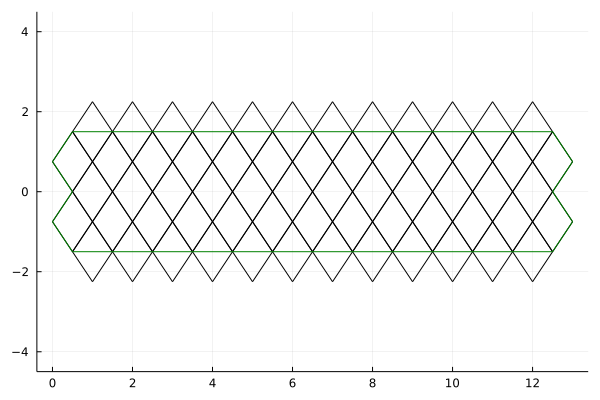

In [46]:
plot(mesh_lorentz)

In [47]:
function find_first_collision(particles::Vector{Particle{T1}}, hard_disks::Vector{Hard_Disk{T1}}, mesh::Mesh{T2, T1}) where {T1 <: Real, T2 <: Real}
    time_collision = Vector{Float64}(undef, length(particles))
    for (i, particle) in enumerate(particles)
        n_cell = particle.cell
        center = mesh.cells_centers[n_cell]
        disk_index = find_hard_disk(hard_disks, center)
        time_collision[i] = particle_disk_collision(particle, hard_disks[disk_index], :method1)[3]
    end
    min_time, particle_index = findmin(time_collision)[1], findmin(time_collision)[2]
    disk_index = find_hard_disk(hard_disks, particles[particle_index].position)
    return min_time, particle_index, disk_index # returns min value and idx 
end

find_first_collision (generic function with 1 method)

## Paso 6

Función para evolucionar el sistema. Definimos una función que calcula el tiempo mínimo entre los tiempos encontrados por las funciones anteriores para cambiar de celda y para tener una colisión. Si corresponde a un cambio de celda, la función modifica la posición de todas las partículas avanzándolas ese tiempo mínimo de cambio de celda. Si corresponde a un tiempo de colisión, se avanza a todas las partículas y se modifica la velocidad de las partículas involucradas en la colisión. Así, esta función devuelve las nuevas posiciones y velocidades y el tiempo que transcurrió. 

In [48]:
function Pₙ(particle::Particle{T}, temperature::T) where T <: Real
    (; mass, position, velocity, normal_velocity, tangential_velocity, cell) = particle
    arg = (-(mass * (norm(normal_velocity)^2)) / (2 * temperature))
    normal_vel_distribution = (mass / temperature) * LinearAlgebra.norm(normal_velocity) * exp(arg)
    
    return normal_vel_distribution
end

function Pₜ(particle::Particle{T}, temperature::T) where T <: Real
    (; mass, position, velocity, normal_velocity, tangential_velocity, cell) = particle
    arg = (-(mass * (norm(tangential_velocity)^2)) / (2 * temperature))
    c = (mass) / (2 * π * temperature)
    tangential_vel_distribution = sqrt(c) * exp(arg)
    
    return tangential_vel_distribution
end

Pₜ (generic function with 1 method)

In [49]:
# Specular collsion with left and right frontiers
function change_velocity_for_particle_in_frontier(particle::Particle{T}, ensemble_type::Val{:microcanonical}) where T <: Real
    normal_velocity_f = -tangential_velocity
    tangential_velocity_f = -normal_velocity
    velocity_f = normal_velocity_f .+ tangential_velocity_f
    
    particle.normal_velocity = normal_velocity_f
    particle.tangential_velocity = tangential_velocity_f
    particle.velocity = velocity_f
    
    return particle
end

#function change_velocity_for_particle_in_frontier(particle::Particle{T}, ensemble_type::Val{:canonical}; frontier_temperature::Symbol = :left_temperature, left_temperature::Real = 140., right_temperature::Real = 160.) where T <: Real
#    (; mass, position, velocity, normal_velocity, tangential_velocity, cell) = particle
#    if frontier_temperature == :left_temperature 
#        temperature = left_temperature
#    elseif frontier_temperature == :right_temperature
#        temperature = right_temperature
#    else
#        error("Temperature of forntier cannot be specified for frontiers other than left or right.")
#    end
#    normal_velocity_f = -LinearAlgebra.normalize(particle.tangential_velocity) .*  Pₙ(particle, temperature)
#    tangential_velocity_f = -LinearAlgebra.normalize(particle.normal_velocity) .*  Pₜ(particle, temperature)
#    velocity_f = normal_velocity_f .+ tangential_velocity_f
#    
#    particle.normal_velocity = normal_velocity_f
#    particle.tangential_velocity = tangential_velocity_f
#    particle.velocity = velocity_f
#    
#    return particle
#end

function change_velocity_for_particle_in_frontier(particle::Particle{T}, ensemble_type::Val{:canonical}; temperature::Real = 160.) where T <: Real
    (; mass, position, velocity, normal_velocity, tangential_velocity, cell) = particle
    
    normal_velocity_f = -LinearAlgebra.normalize(particle.tangential_velocity) .*  Pₙ(particle, temperature)
    tangential_velocity_f = -LinearAlgebra.normalize(particle.normal_velocity) .*  Pₜ(particle, temperature)
    velocity_f = normal_velocity_f .+ tangential_velocity_f
    
    particle.normal_velocity = normal_velocity_f
    particle.tangential_velocity = tangential_velocity_f
    particle.velocity = velocity_f
    
    return particle
end

change_velocity_for_particle_in_frontier(particle::Particle{T}, ensemble_type::Symbol; kwargs...) where T <: Real = change_velocity_for_particle_in_frontier(particle, Val(ensemble_type); kwargs...)

change_velocity_for_particle_in_frontier (generic function with 3 methods)

In [50]:
# for intersection with a frontier (cell frontier or system frontier)
function advance_particles(time::T1, particles::Vector{Particle{T1}}, mesh::Mesh{T2, T1}, ensemble_type::Symbol; left_temperature::Real = 140., right_temperature::Real = 160.) where {T1 <: Real, T2 <: Real}
    for (i, particle) in enumerate(particles)
        particle_cell = mesh.cells[particle.cell]
        min_intersection_time, intersected_segment, index_intersected_segment = particle_polygonfrontier_intersection(particle, particle_cell, mesh)
        cell_type = find_type_of_frontier_polygon(particle_cell, mesh)
        L = [mesh.cells_per_dims[1] * mesh.cell_size[1], 2 * mesh.cell_size[2]]
        if ensemble_type == :microcanonical
            left_temperature = right_temperature = 150.
        end
        
        if (intersected_segment in mesh.reflective_segments) && (cell_type == :left) # this condition is more specific than ((cell_type == :left) || (cell_type == :right))
            #particles[i] = change_velocity_for_particle_in_frontier(particle, ensemble_type)
            particle = change_velocity_for_particle_in_frontier(particle, ensemble_type; temperature = left_temperature)
        elseif (intersected_segment in mesh.reflective_segments) && (cell_type == :right)
            particle = change_velocity_for_particle_in_frontier(particle, ensemble_type; temperature = right_temperature)
        elseif cell_type == :upper
            particle_position_f = particle.position .- [0., L[2]]
            particle.position = particle_position_f
        elseif cell_type == :lower
            particle_position_f = particle.position .+ [0., L[2]]
            particle.position = particle_position_f
        elseif cell_type == :center # inside mesh
            particle.position = [MRU(time, particle.position, particle.velocity, dim) for dim in [:x, :y]] #se supone que
        else
            error("cell type cannot be identified in advance_particles function")
        end
    end
    return particles
end

advance_particles (generic function with 1 method)

In [51]:
# for collisions
function advance_particles(time::T, particles::Vector{Particle{T}}, disks::Vector{Hard_Disk{T}}, particle_index::Int, disk_index::Int) where T <: Real
    particle_collision = particles[particle_index] # Aqui falta terminar
    disk_collison = disks[disk_index]
    collision, 𝑣𝑒𝑐𝑥𝑓, t_collision, particle_velocity_f, disk_angular_velocity_f = particle_disk_collision_dynamics(particle_collision, disk_collision)
    particles_f = advance_particles(particles, time)
    disks[disk_index].angular_velocity = disk_angular_velocity_f
    particles_f[particle_index].velocity = particle_velocity_f
    particles_f[particle_index].normal_velocity = normal_velocity(particle_velocity_f)
    particles_f[particle_index].tangential_velocity = tangential_velocity(particle_velocity_f)
    return particles_f, disks
end

advance_particles (generic function with 2 methods)

In [52]:
function evolve_one_step(particles::Vector{Particle{T1}}, disks::Vector{Hard_Disk{T1}}, mesh::Mesh{T2, T1}; ensemble_type = :microcanonical) where {T1 <: Real, T2 <: Real}
    first_particle_exit_idx, first_exit_time, adjacent_cell = first_particle_to_exit_cell(particles, mesh)
    first_collision_time, particle_index, disk_index = find_first_collision(particles, disks, mesh)
    first_exit_time, first_collision_time
    min_time = minimum([first_exit_time, first_collision_time])
    particles_f = Array{Float64}(undef, length(particles))
    #for particle in particles
    if min_time == first_exit_time
        particles_f = advance_particles(min_time, particles, mesh, ensemble_type)
        disks_f = disks
    elseif min_time == first_collision_time
         particles_f, disks_f = advance_particles(min_time, particles, disks, particle_index, disk_index)
    else
        error("min_time does not correspond to an exit time or a collsion time.")
    end
    #end
    
    return particles_f, disks_f, min_time
end

evolve_one_step (generic function with 1 method)

## Paso 7
Usando la función anteriror haz otra que evolucione el sistema un tiempo $t$. Para esto, aplica la función anterior, cada vez restando a $t$ el tiempo de evolución $t_e$. Cuando se llega a $t<0$, la evolución se detiene y se mueve las partículas un tiempo $t$(que ya es negativo). 

In [53]:
function advance_particles_Δt(particles::Vector{Particle{T}}, Δt::T) where T <: Real
    for particle in particles
        particle.position = [MRU(Δt, particle.position, particle.velocity, dim) for dim in [:x, :y]] #se supone que 
    end
    return particles
end

advance_particles_Δt (generic function with 1 method)

In [54]:
function evolve_system(particles::Vector{Particle{T1}}, disks::Vector{Hard_Disk{T1}}, mesh::Mesh{T2, T1}, time::Real; ensemble_type = :microcanonical) where {T1 <: Real, T2 <: Real}
    tₑ = 0.
    particles_vec = []
    disks_vec = []
    
    while time >= 0 
        particles_f, disks_f, tₑ = evolve_one_step(particles, disks, mesh; ensemble_type = ensemble_type)
        t = time - tₑ
        push!(particles_vec, particles_f)
        push!(disks_vec, disks_f)
        particles, disks = particles_f, disks_f
        time = t
    end
    
    particles_f = advance_particles_Δt(particles_vec[end], time)
    disks_f = disks_vec[end]
    push!(particles_vec, particles_f)
    push!(disks_vec, disks_f)
    
    return particles_vec, disks_vec
end

evolve_system (generic function with 1 method)

In [55]:
function initialize_rand_disks(mesh::Mesh{T2, T1}; disk_mass::Real = 1., disk_radius::Real = 0., n_particles::Int = 30) where {T1 <: Real, T2 <: Real}
    (; cells_per_dims, cell_size, cells, cells_centers, frontier, include_frontier, reflective_segments) = mesh
    minor_diagonal = cell_size[1]
    horizon_distance = (2 + (8 * sqrt(3)))
    (disk_radius == 0.) ? (disk_radius = minor_diagonal / horizon_distance) : (disk_radius = disk_radius)
    
    disk_angular_velocities = Vector{Vector{T1}}(undef, length(cells))
    particle_velocities = Vector{Vector{T1}}(undef, n_particles)
    particle_positions = Vector{Vector{T1}}(undef, n_particles)
    
    for (i, cell) in enumerate(cells)
        disk_angular_velocities[i] = LinearAlgebra.normalize(rand(T1, 2))
    end
    
    disk_positions = cells_centers
    
    return generate_hard_disk_vector(disk_mass, disk_radius, disk_positions, disk_angular_velocities , mesh)
end

initialize_rand_disks (generic function with 1 method)

In [56]:
function initialize_rand_particles(mesh::Mesh{T2, T1}; n_particles::Real = 30, particle_mass::Real = 1., disk_radius::Real = 0.) where {T1 <: Real, T2 <: Real}
    (; cells_per_dims, cell_size, cells, cells_centers, frontier, include_frontier, reflective_segments) = mesh
    minor_diagonal = cell_size[1]
    horizon_distance = (2 + (8 * sqrt(3)))
    (disk_radius == 0.) ? (disk_radius = minor_diagonal / horizon_distance) : (disk_radius = disk_radius)
    
    particle_velocities = Vector{Vector{T1}}(undef, n_particles)
    particle_positions = Vector{Vector{T1}}(undef, n_particles)
    cells_on_frontier = get_frontier(mesh, get_array = true)
    mesh_without_frontier_cells = setdiff(cells, cells_on_frontier)
    rand_cells = [rand(mesh_without_frontier_cells) for _ in 1:n_particles]
    for (i, cell) in enumerate(rand_cells)
        particle_velocities[i] = LinearAlgebra.normalize(rand(T1, 2))
        particle_positions[i] = rand(cell.vertices)
        #particle_positions[i] = cell.center .+ (disk_radius .+ (horizon_distance * 0.5 * rand(1))) #T1 no puede ser int
    end
    particles_vec = generate_particle_vector(particle_mass, particle_positions, particle_velocities, mesh)
end

initialize_rand_particles (generic function with 1 method)

## Paso 8

Ahora hacemos un gif animado para 30 particulas y t = 50.

In [57]:
include("Geometric_structures.jl")
include("particle_disk_dynamics.jl")

Θ (generic function with 4 methods)

In [58]:
# Esta funcion puede modificarse para determinar la celda adyacente utilizando las propiedades periódicas del sistema
# Inside mesh, the particle is not in the frontier
function find_adjacent_cell(time_intersection::T1, particle::Particle{T1}, neighbours::Vector{Rhomboid{T1}}, mesh::Mesh{T2, T1}; Δt::Float64 = 0.001) where {T1 <: Real, T2 <: Real}
    particle_cell = mesh.cells[particle.cell]
    cell_type = find_type_of_frontier_polygon(particle_cell, mesh)
    L = [mesh.cells_per_dims[1] * mesh.cell_size[1], 2 * mesh.cell_size[2]]
    #L = mesh.cells_per_dims .* mesh.cell_size
    
    if cell_type == :center
        @show particle.position
        particle_position_f = [MRU(time_intersection + Δt, particle.velocity, particle.position, dim) for dim in [:x, :y]]
        @show particle_position_f
        @show neighbours
        adjacent_cell_in_neighbours = find_cell(particle_position_f, neighbours)[1]
        adjacent_cell_idx = find_cell(neighbours[adjacent_cell_in_neighbours].center, mesh)[1]
        adjacent_cell = mesh.cells[adjacent_cell_idx]
        
    elseif (cell_type == :left) || (cell_type == :right) # la particula rebota,e ntonces se queda en su misma celda
        adjacent_cell_in_neighbours = particle_cell.cell
        adjacent_cell = particle_cell
        
    elseif cell_type == :lower
        center_adjacent_cell = particle_cell.center .+ [0., L[2]]
        adjacent_cell_in_neighbours = find_cell(center_adjacent_cell, neighbours)[1]
        adjacent_cell_idx = find_cell(neighbours[adjacent_cell_in_neighbours].center, mesh)[1]
        adjacent_cell = mesh.cells[adjacent_cell_idx]
        
    elseif cell_type == :upper
        center_adjacent_cell = particle_cell.center .+ [0., -L[2]]
        adjacent_cell_in_neighbours = find_cell(center_adjacent_cell, neighbours)[1]
        adjacent_cell_idx = find_cell(neighbours[adjacent_cell_in_neighbours].center, mesh)[1]
        adjacent_cell = mesh.cells[adjacent_cell_idx]
    else
        error("The adjacent cell is not included in the specified mesh.")
    end
    return adjacent_cell_idx, adjacent_cell, neighbours
end

find_adjacent_cell (generic function with 1 method)

In [122]:
total_time = 10
total_particles = 30
rhomboids_per_dims = [30, 2]
rhomboid_diagonal = [1., 1.]
frontier_lorentz = generate_frontier_lorentz_gas(rhomboids_per_dims, rhomboid_diagonal, include_frontier = false)
simulation_mesh = generate_rhomboid_mesh(rhomboids_per_dims, rhomboid_diagonal, frontier_lorentz, include_frontier = true)
initial_disks_vec = initialize_rand_disks(simulation_mesh)
initial_particles_vec = initialize_rand_particles(simulation_mesh);
particles_vec =[]
disks_vec = []

for t in 1:total_time
    @show t
    particles, disks = evolve_system(initial_particles_vec, initial_disks_vec, simulation_mesh, t; ensemble_type = :canonical)
    push!(particles_vec, particles)
    push!(disks_vec, disks)
end

t = 1
t = 2
t = 3
t = 4
t = 5
t = 6
t = 7
t = 8
t = 9
t = 10


In [121]:
[norm(particle.velocity) for particle in unique(particles_vec[1])[1]]

30-element Vector{Float64}:
   1.0
 NaN
   1.0
   1.0
   0.9999999999999999
   1.0
   0.9999999999999999
   0.9999999999999999
   0.9999999999999998
   0.9999999999999999
   1.0
   1.0
   0.9999999999999998
   ⋮
   1.0
   1.0
   0.9999999999999999
   1.0
   1.0
   1.0
   0.9999999999999999
   1.0
   0.9999999999999999
   1.0
   0.9999999999999999
   0.9999999999999999

In [113]:
boltzmann_velocities_distribution_particles = [norm(particle.velocity) for time_step in particles_vec for particle in unique(time_step)[1]];
unique(boltzmann_velocities_distribution_particles)

4-element Vector{Float64}:
 1.0000000000000002
 0.9999999999999999
 1.0
 0.9999999999999998

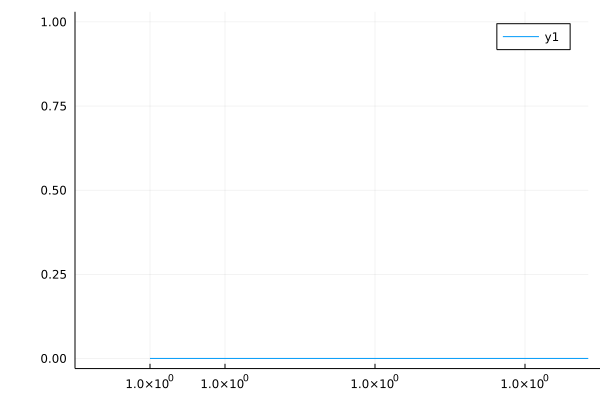

In [109]:
for time_step in particles_vec
    boltzmann_velocities_distribution_particles = [norm(particle.velocity) for particle in unique(time_step)[1]]
    density(boltzmann_velocities_distribution_particles)   
end
plot!()

In [ ]:
density

In [ ]:
StatsBase.density

In [ ]:
boltzmann

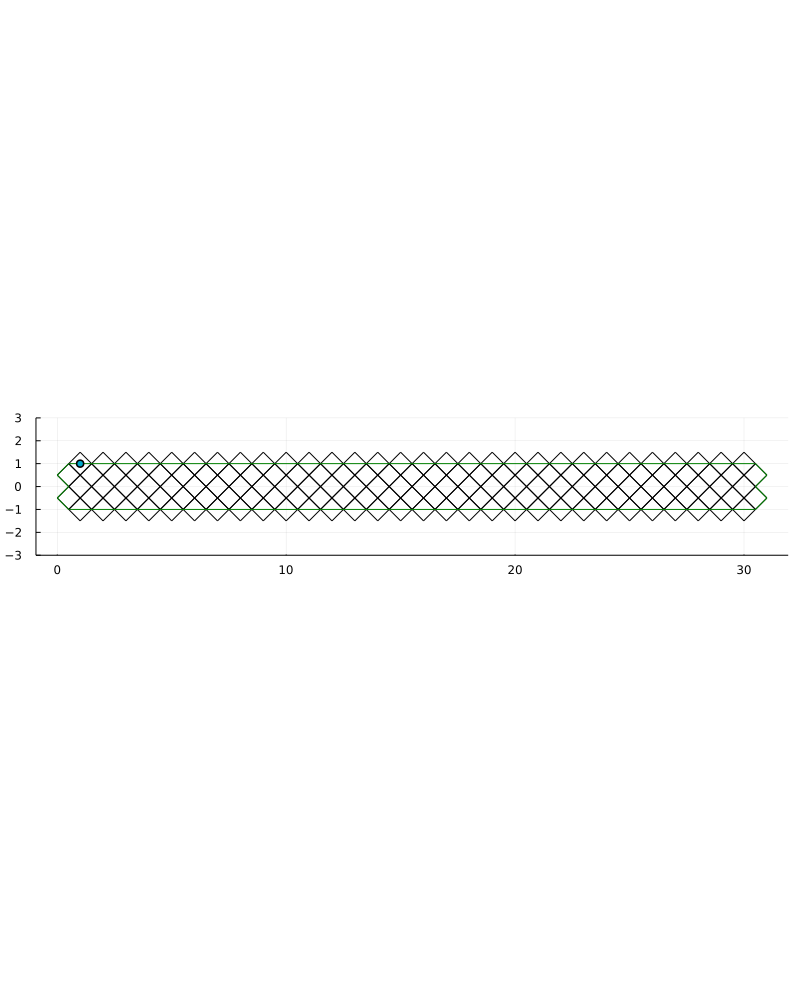

In [84]:
plot(simulation_mesh, size = (800, 1000))
ylims!(-3, 3)
scatter!(Tuple([1., 1.]), marker_size = 1.)

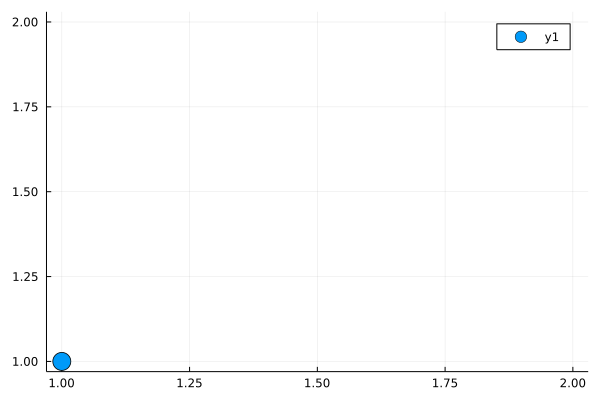

In [79]:
scatter(Tuple([1., 1.]), markersize = 10)

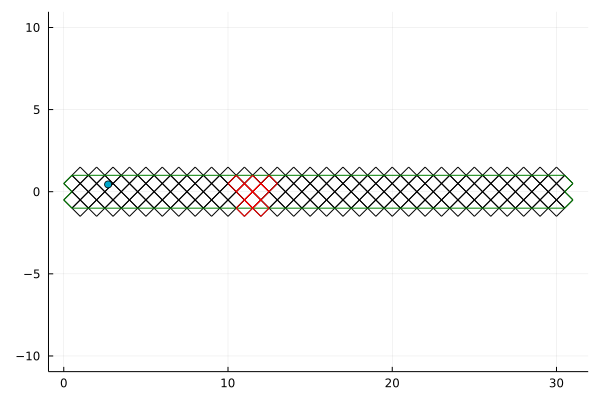

In [62]:
plot(simulation_mesh)
scatter!(Tuple([2.701798757359753, 0.4446304524179902]))
plot!(neighbours1, color = :red)

In [63]:
particles_vec

2-element Vector{Vector{Particle}}:
 #undef
 #undef

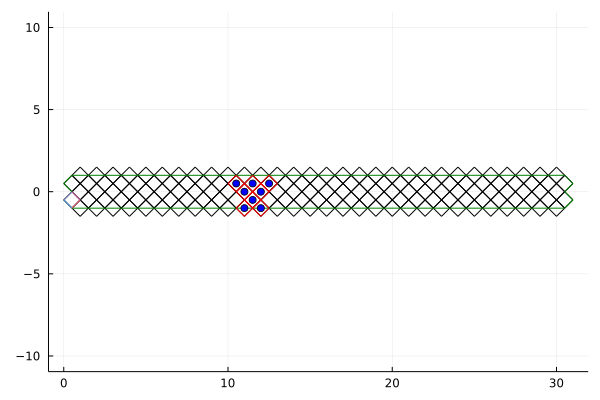

In [64]:
plot(simulation_mesh)
plot!(neighbours1, color_polygon = :red, plot_polygon_center = true)
#scatter!(Tuple(particle1.position))
plot!(simulation_mesh.cells[particle1.cell])
#scatter!(Tuple.(centers1), color = :yellow)

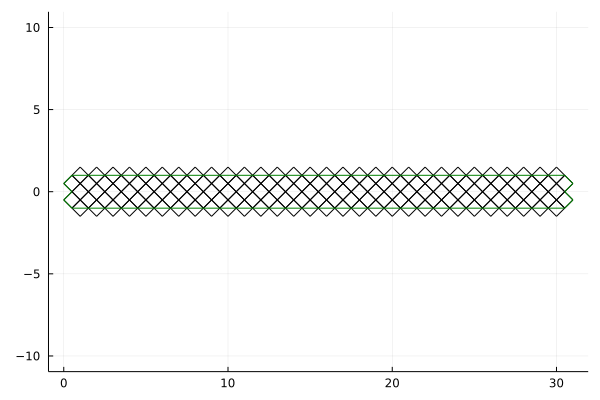

In [65]:
plot(simulation_mesh)

Para cada frame obtén la distribución de velocidades de las partículas, es decir un arreglo con la norma de las velocidades de las partículas. Guarda todos esos arreglos en otro llamado Boltzmann_velocities_distribution

In [66]:
rhomboids_per_dims = [12, 2]
rhomboid_diagonal = [1, 1.]
frontier_lorentz = generate_frontier_lorentz_gas(rhomboids_per_dims, rhomboid_diagonal; )
mesh_lorentz = generate_rhomboid_mesh(rhomboids_per_dims, rhomboid_diagonal, frontier_lorentz, include_frontier = true, )

cell = mesh_lorentz.cells[22]
neighbors_indices, neighbors_centers = find_neighbors(cell, mesh_lorentz);

p = plot(mesh_lorentz, alpha = 0.5, size = (800, 600))

for center in neighbors_centers
    scatter!([center[1]], [center[2]], color = :blue)
end

plot!.(mesh_lorentz.reflective_segments, color=:orange, lw=5)

plot!(cell, color = :red, lw=5)
p
png(p, "mesh.png")